xgboost算法原理小结：https://www.cnblogs.com/pinard/p/10979808.html

xgboost类库使用小结：https://www.cnblogs.com/pinard/p/11114748.html

xgboost类库使用代码：https://github.com/ljpzzz/machinelearning/blob/master/ensemble-learning/xgboost-example.ipynb

xgboost和k-fold结合：https://blog.csdn.net/liuzonghao88/article/details/88874239

XGBClassifier() 参数

**常规参数**

- booster

    gbtree 树模型做为基分类器（默认）
    
    gbliner 线性模型做为基分类器
    
- silent

    silent=0时，不输出中间过程（默认）
    
    silent=1时，输出中间过程
    
- nthread

    nthread=-1时，使用全部CPU进行并行运算（默认）
    
    nthread=1时，使用1个CPU进行运算。
    
- scale_pos_weight

    正样本的权重，在二分类任务中，当正负样本比例失衡时，设置正样本的权重，模型效果更好。例如，当正负样本比例为1:10时，scale_pos_weight=10。
    
**模型参数**

- n_estimatores

    含义：总共迭代的次数，即决策树的个数

    调参：
    
- early_stopping_rounds

    含义：在验证集上，当连续n次迭代，分数没有提高后，提前终止训练。
    
    调参：防止overfitting。
    
- max_depth

    含义：树的深度，默认值为6，典型值3-10。
    
    调参：值越大，越容易过拟合；值越小，越容易欠拟合。
    
- min_child_weight

    含义：默认值为1。
    
    调参：值越大，越容易欠拟合；值越小，越容易过拟合（值较大时，避免模型学习到局部的特殊样本）。
    
- subsample

    含义：训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1。
    
    调参：防止overfitting。
    
- colsample_bytree

    含义：训练每棵树时，使用的特征占全部特征的比例。默认值为1，典型值为0.5-1。
    
    调参：防止overfitting。
    
**学习任务参数**

- learning_rate

    含义：学习率，控制每次迭代更新权重时的步长，默认0.3。
    
    调参：值越小，训练越慢。
    
    典型值为0.01-0.2。
    
- objective 目标函数

    回归任务
    
        reg:linear 默认
        
        reg:logistic 
        
    二分类
    
        binary:logistic 概率 
        
        binary：logitraw 类别
        
    多分类
        multi：softmax  num_class=n   返回类别
        
        multi：softprob   num_class=n  返回概率
        
    rank:pairwise 
    
- eval_metric

    回归任务(默认rmse)
    
        rmse--均方根误差
        
        mae--平均绝对误差
        
    分类任务(默认error)
    
        auc--roc曲线下面积
        
        error--错误率（二分类）
        
        merror--错误率（多分类）
        
        logloss--负对数似然函数（二分类）
        
        mlogloss--负对数似然函数（多分类）

- gamma

    惩罚项系数，指定节点分裂所需的最小损失函数下降值。
    
    调参：
    
- alpha

    L1正则化系数，默认为1
    
- lambda

    L2正则化系数，默认为1
    

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

train_test_split

In [37]:
data = pd.read_csv('../feature_extract/reduce_train_108.csv')

In [38]:
Y = data.pop('accuracy_group')
data.pop('installation_id')
X = data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [40]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [42]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.35%


paint tree

pip install pydot graphviz

linux下环境变量的配置

sudo apt install graphviz

dot -v

export PATH=$PATH:/usr/lib/x86_64-linux-gnu/graphviz

reference: https://blog.csdn.net/fontthrone/article/details/84765478

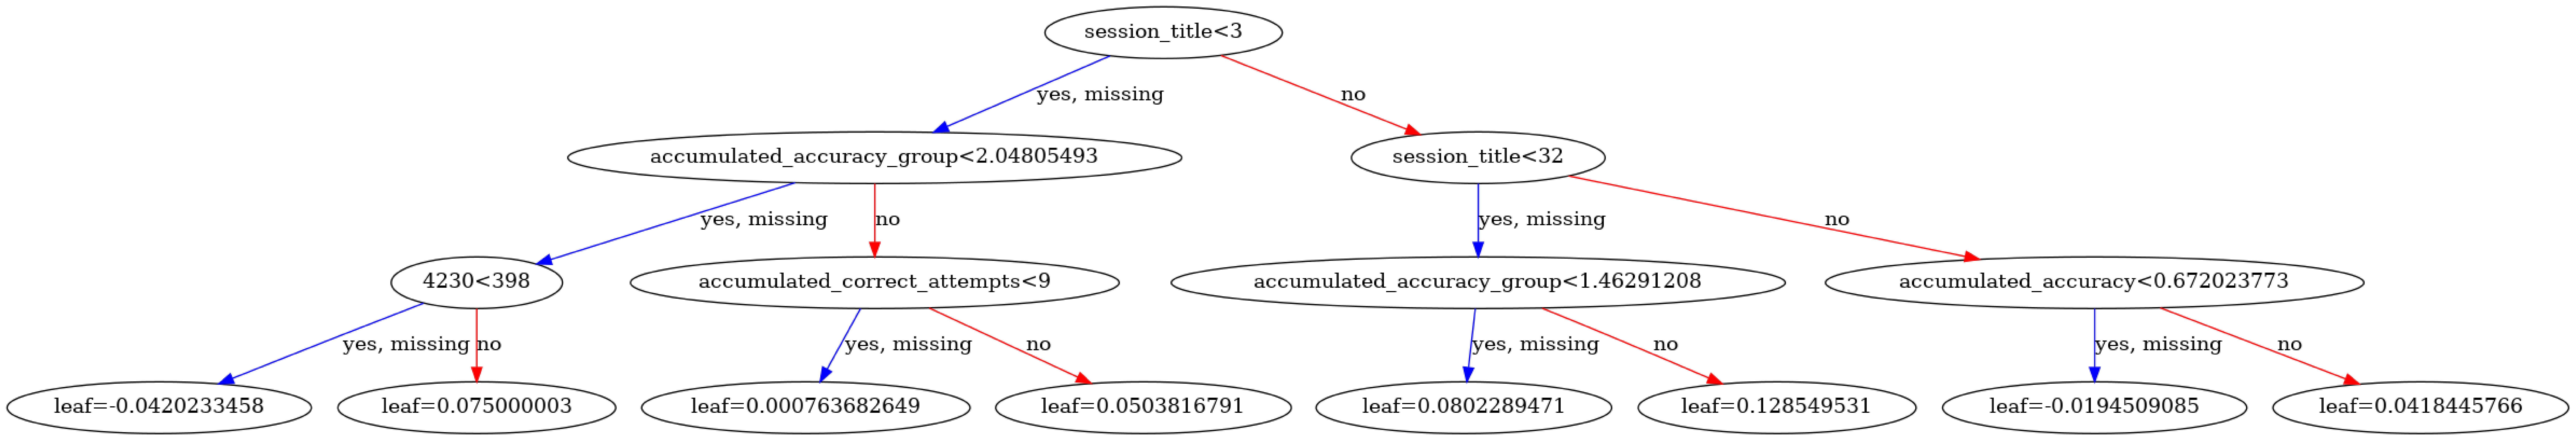

In [48]:
plot_tree(model, num_trees=3)
fig = plt.gcf()
fig.set_size_inches(250, 200)
plt.show()
fig.savefig('tree.png')

grid search cv

In [9]:
# search max_depth and e_estimators
from sklearn.model_selection import GridSearchCV
model = XGBClassifier(max_depth=5,learning_rate= 0.5, verbosity=1, objective='binary:logistic',random_state=1)
gsCv = GridSearchCV(model,
                   {'max_depth': [4,5,6],
                    'n_estimators': [5,10,20]})
gsCv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.5, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6], 'n_estimators': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [10]:
print(gsCv.best_score_)
print(gsCv.best_params_)

0.619629667999296
{'max_depth': 5, 'n_estimators': 10}


In [11]:
# search learning_rate
model = XGBClassifier(max_depth=4,n_estimators=10,verbosity=1, objective='binary:logistic',random_state=1)
gsCv2 = GridSearchCV(model, 
                   {'learning_rate ': [0.3,0.5,0.7]})
gsCv2.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate ': [0.3, 0.5, 0.7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
print(gsCv2.best_score_)
print(gsCv2.best_params_)

0.6119983074816551
{'learning_rate ': 0.3}


In [13]:
# avoid overfitting
import xgboost as xgb

dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
model = XGBClassifier(max_depth=4,learning_rate=0.3, verbosity=1, objective='binary:logistic',n_estimators=10)
model.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="merror", eval_set=[(X_test, y_test)]) # use merror or mlogloss for multi-class classification

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-merror:0.403618
Will train until validation_0-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.392312
[2]	validation_0-merror:0.389768
[3]	validation_0-merror:0.386094
[4]	validation_0-merror:0.386094
[5]	validation_0-merror:0.382985
[6]	validation_0-merror:0.384963
[7]	validation_0-merror:0.383267
[8]	validation_0-merror:0.384963
[9]	validation_0-merror:0.38355


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [14]:
pred_test_new = model.predict(X_test)
print (accuracy_score(dtest.get_label(), pred_test_new))

0.6170152628603731


k-fold

In [15]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
# k = 10
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 61.83% (1.51%)


In [17]:
# k = 5
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=5, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 61.69% (1.34%)


In [18]:
# k = 3
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=5, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 61.69% (1.34%)


stratified k-fold

In [19]:
from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [20]:
# k = 10
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 55.73% (10.80%)


In [21]:
# k = 5
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 55.73% (10.80%)


In [ ]:
# k = 3
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


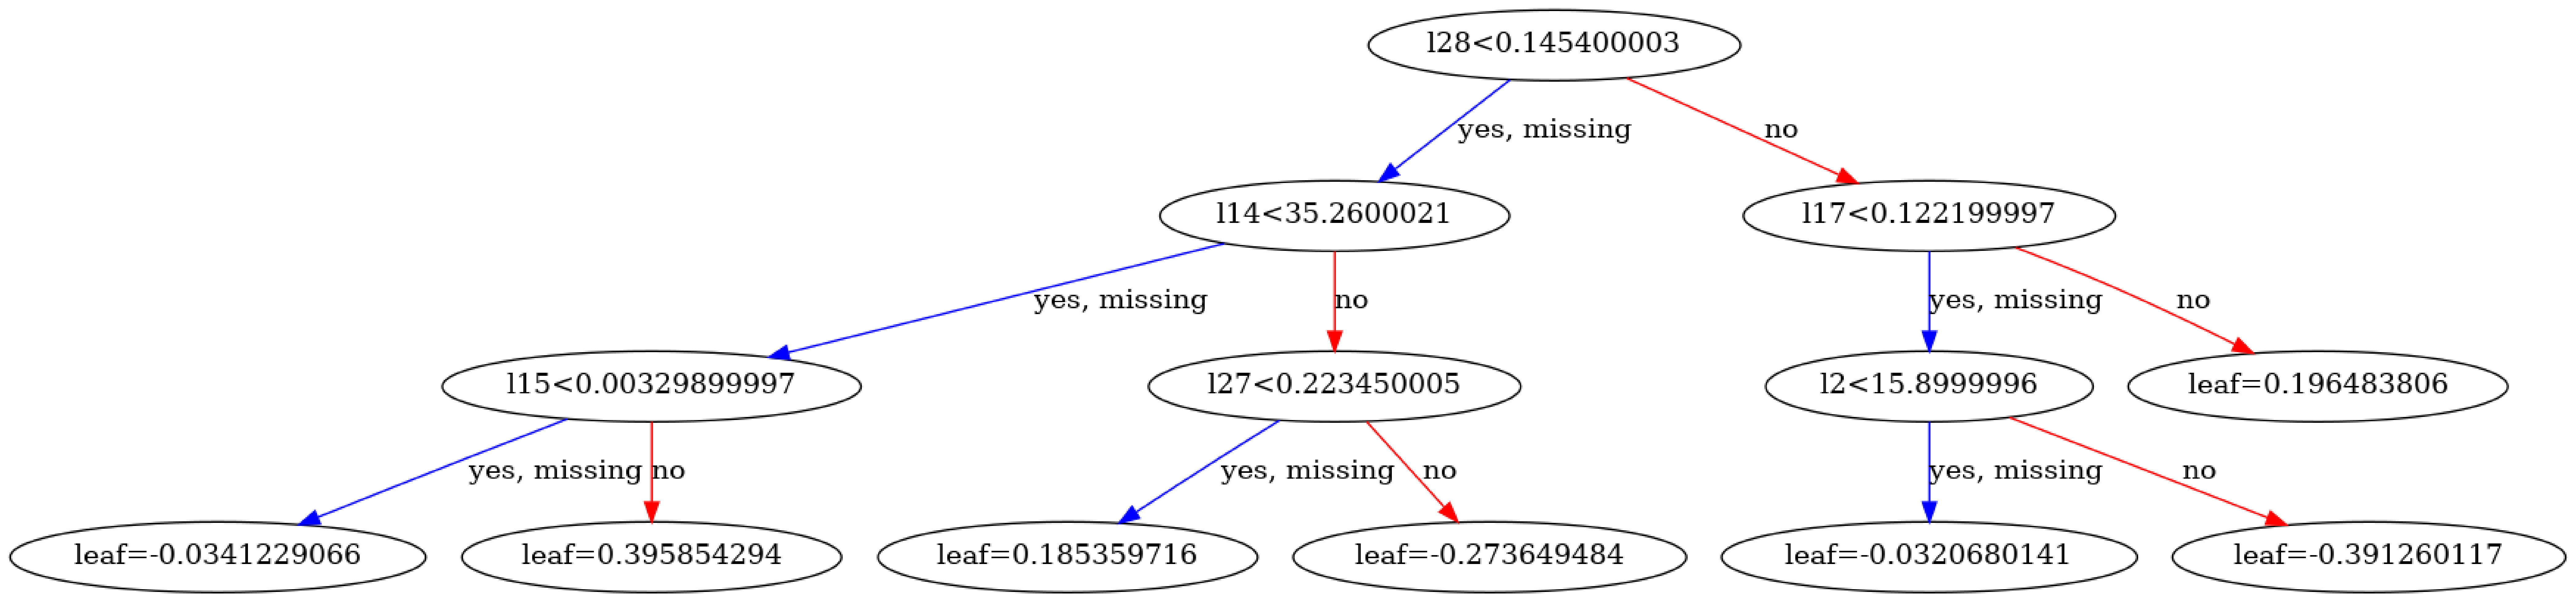

In [45]:
from sklearn.model_selection import train_test_split
from pandas import DataFrame

from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
 
breast_cancer=load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
 
X = DataFrame(X)
y = DataFrame(y)
# breast_cancer.feature_names的名字中带有空格，会报错。
X.columns = breast_cancer.feature_names
X.columns = ['l1','l2','l3','l4','l5','l6','l7','l8','l9','l10','l11','l12','l13','l14',
             'l15','l16','l17','l18','l19','l20','l21','l22','l23','l24','l25',
             'l26','l27','l28','l29','l30',]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
 
 
clf = XGBClassifier(
    n_estimators=30,#三十棵树
    learning_rate =0.3,
    max_depth=3,
    min_child_weight=1,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    scale_pos_weight=1,
    reg_lambda=1,
    seed=27)
 
model_sklearn=clf.fit(X_train, y_train)
y_sklearn= clf.predict_proba(X_test)[:,1]

plot_tree(clf, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()
fig.savefig('tree.png')